In [2]:
%load_ext autoreload
%autoreload 2
import pandas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab

from docx import Document
from docx.shared import Pt
import traceback
from docx.oxml.shared import OxmlElement, qn

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import seaborn as sns
# pandas.set_option('display.float_format', lambda x: '%.1f' % x)
%matplotlib inline

In [3]:
df = pandas.read_csv("exo_one/exo_one.csv")

In [4]:
df.drop(['Κωδικός Πρότασης', 'Εταίρος ΕΦΔ', 'Επωνυμία Επιχείρησης', 'Περιγραφή ΚΑΔ Επένδυσης'], axis=1, inplace=True)

In [5]:
df.loc[df['ΠΕΠ'].str.contains('Μεσαίες'), 'ΠΕΠ'] = "Μεσαίες"
df.loc[df['ΠΕΠ'].str.contains('Μεγάλες'), 'ΠΕΠ'] = "Μεγάλες"
df.loc[df['ΠΕΠ'].str.contains('Μικρές'), 'ΠΕΠ'] = "Μικρές και Πολύ Μικρές"

In [6]:
df.rename(columns={'ΠΕΠ': 'Μέγεθος Επιχείρησης'}, inplace=True)

In [7]:
df['two_digit_sectors'] = df['ΚΑΔ Επένδυσης'].str[0:2].astype(int)

In [8]:
# df.dtypes
df.head(2)
# df['ΚΑΔ Επένδυσης'].sort_values().unique()
# df = df.astype(str, inplace=True)

,ΚΑΔ Επένδυσης,Περιφέρεια Υλοποίησης,Μέγεθος Επιχείρησης,Συνολικός Προϋπολογισμός,Επιχορηγούμενος Προϋπολογισμός,Δημόσια Δαπάνη Ολοκλήρωσης,two_digit_sectors
0,23.70.12,ΘΕΣΣΑΛΙΑ,Μικρές και Πολύ Μικρές,50748.09,47450.0,21352.5,23
1,27.12.31,ΘΕΣΣΑΛΙΑ,Μικρές και Πολύ Μικρές,153000.00,153000.0,68850.0,27


In [8]:
df.dtypes

ΚΑΔ Επένδυσης                      object
Περιφέρεια Υλοποίησης              object
Μέγεθος Επιχείρησης                object
Συνολικός Προϋπολογισμός          float64
Επιχορηγούμενος Προϋπολογισμός    float64
Δημόσια Δαπάνη Ολοκλήρωσης        float64
two_digit_sectors                   int64
dtype: object

In [9]:
df['two_digit_sectors'].sort_values().unique()

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 41, 42, 43, 46, 58, 62, 63, 70, 71, 73, 74,
       86])

In [10]:
### the following lines are not necessary if excel file is saved as csv without comma thousand separators
# df['Συνολικός Προϋπολογισμός'] = df['Συνολικός Προϋπολογισμός'].str.replace(",","").astype(float)
# df['Επιχορηγούμενος Προϋπολογισμός'] = df['Επιχορηγούμενος Προϋπολογισμός'].str.replace(",","").astype(float)
# df['Δημόσια Δαπάνη Ολοκλήρωσης'] = df['Δημόσια Δαπάνη Ολοκλήρωσης'].str.replace(",","").astype(float)

In [11]:
totals = df.groupby(['two_digit_sectors'],sort=True).sum()
totals.sample()

,Συνολικός Προϋπολογισμός,Επιχορηγούμενος Προϋπολογισμός,Δημόσια Δαπάνη Ολοκλήρωσης
two_digit_sectors,,,
15,353654.12,326300.02,146835.01


In [12]:
sectors={}
for i in range(10, 34):  # range(a,b) gives [a,b)
    sectors[i] = 'Μεταποίηση'
for i in range(41, 44):
    sectors[i] = "Κατασκευές"
for i in range(45, 48):
    sectors[i] = "Εμπόριο"
for i in range(58, 64):
    sectors[i] = "ΤΠΕ"
for i in range(70, 75):
    sectors[i] = "Επαγ/Επιστ. Δρ."
sectors[86] = "Υγεία"
## the following sectors are present only in exo2 
# sectors[38] = "Άλλο"
# sectors[1] = "Άλλο"
# sectors[8] = "Άλλο"
# sectors

In [13]:
df['Κλάδος'] = df["two_digit_sectors"].map(sectors)
# df['Κλάδος'].head()

In [14]:
general_sec_totals = df.groupby(['Κλάδος'], sort=True).sum()
general_sec_totals

,Συνολικός Προϋπολογισμός,Επιχορηγούμενος Προϋπολογισμός,Δημόσια Δαπάνη Ολοκλήρωσης,two_digit_sectors
Κλάδος,,,,
Εμπόριο,3804814.48,3770496.43,1861148.90,1058
Επαγ/Επιστ. Δρ.,2130415.09,2088316.66,955797.89,2198
Κατασκευές,925794.39,917316.65,404262.14,544
Μεταποίηση,37503875.90,36701685.01,16555866.08,6616
ΤΠΕ,10693094.32,10360070.24,4677934.55,6268
Υγεία,214425.97,214425.97,96115.35,172


In [15]:
general_sec_totals.drop(['two_digit_sectors'], axis=1, inplace=True)
df.drop(['two_digit_sectors'], axis=1, inplace=True)

In [16]:
# general_sec_totals

In [17]:
general_sec_totals = general_sec_totals.sort_values("Συνολικός Προϋπολογισμός", ascending=False).reset_index()

In [18]:
# general_sec_totals

In [19]:
general_sec_means = df.groupby(['Κλάδος'], sort=True).mean()

In [20]:
# for col in general_sec_means.columns:
#     totals_df[col] = totals_df[col]/1000
# general_sec_means = general_sec_means/1000

In [21]:
# general_sec_means.drop(['two_digit_sectors'], axis=1, inplace=True)
general_sec_means = general_sec_means.add_suffix(", μέσος όρος, χιλ. ευρώ")
general_sec_means = general_sec_means.reset_index()
# general_sec_means

In [22]:
# general_sec_means

In [23]:
projects_number = df.groupby(['Κλάδος'], sort=True).size()
# projects_number

In [24]:
projects_df = pandas.DataFrame(projects_number, columns=['Αριθμός Έργων']).reset_index()
# projects_df

In [25]:
totals_df = pandas.merge(general_sec_totals, projects_df, on="Κλάδος")
totals_df = pandas.merge(totals_df, general_sec_means, on="Κλάδος")
# totals_df

In [26]:
total_budget = totals_df["Συνολικός Προϋπολογισμός"].sum()
subsidy_budget = totals_df["Επιχορηγούμενος Προϋπολογισμός"].sum()
public_spending = totals_df["Δημόσια Δαπάνη Ολοκλήρωσης"].sum()
total_projects = totals_df['Αριθμός Έργων'].sum()

In [27]:
totals_df['% Συνολικού Προϋπολογισμού'] = (totals_df['Συνολικός Προϋπολογισμός']/total_budget)*100
totals_df['% Επιχορηγούμενου Προϋπολογισμού'] = (totals_df['Επιχορηγούμενος Προϋπολογισμός']/subsidy_budget*100)
totals_df['% Δημόσιας Δαπάνης Ολοκλήρωσης'] = (totals_df['Δημόσια Δαπάνη Ολοκλήρωσης']/public_spending)*100
totals_df['% Συνόλου Έργων'] = (totals_df['Αριθμός Έργων']/total_projects)*100
totals_df['% Δημόσιας Δαπάνης στο Σύνολο του Προϋπολογισμού'] = totals_df['Δημόσια Δαπάνη Ολοκλήρωσης']/totals_df['Συνολικός Προϋπολογισμός']*100

In [28]:
# totals_df

In [29]:
# totals_df.dtypes

In [30]:
# totals_df['Αριθμός Έργων'] = totals_df['Αριθμός Έργων'].astype(float)

## Reformat data for beautiful charts

In [31]:
# print (totals_df.columns.isin(df.columns))

In [32]:
for col in totals_df.columns[1:4]:
    totals_df[col] = totals_df[col]/1000000 # Συνολικοί Προϋπολογισμοί, σε εκατ. ευρω
for col in totals_df.columns[5:8]:
    totals_df[col] = totals_df[col]/1000 # Mέσος όρος δαπανών ολοκλήρωσης, σε εκατοντάδες χιλιάδες ευρώ

#### Rename columns names with millions

In [33]:
totals_df.columns = np.where(totals_df.columns.isin(totals.columns), totals_df.columns + ", εκ. ευρώ", totals_df.columns)
totals_df

,Κλάδος,"Συνολικός Προϋπολογισμός, εκ. ευρώ","Επιχορηγούμενος Προϋπολογισμός, εκ. ευρώ","Δημόσια Δαπάνη Ολοκλήρωσης, εκ. ευρώ",Αριθμός Έργων,"Συνολικός Προϋπολογισμός, μέσος όρος, χιλ. ευρώ","Επιχορηγούμενος Προϋπολογισμός, μέσος όρος, χιλ. ευρώ","Δημόσια Δαπάνη Ολοκλήρωσης, μέσος όρος, χιλ. ευρώ",% Συνολικού Προϋπολογισμού,% Επιχορηγούμενου Προϋπολογισμού,% Δημόσιας Δαπάνης Ολοκλήρωσης,% Συνόλου Έργων,% Δημόσιας Δαπάνης στο Σύνολο του Προϋπολογισμού
0,Μεταποίηση,37.503876,36.701685,16.555866,315,119.059923,116.513286,52.558305,67.852784,67.900307,67.434246,64.814815,44.144414
1,ΤΠΕ,10.693094,10.360070,4.677935,102,104.834258,101.569316,45.862103,19.346166,19.166748,19.053850,20.987654,43.747249
2,Εμπόριο,3.804814,3.770496,1.861149,23,165.426717,163.934627,80.919517,6.883749,6.975643,7.580707,4.732510,48.915628
3,Επαγ/Επιστ. Δρ.,2.130415,2.088317,0.955798,31,68.723067,67.365054,30.832190,3.854391,3.863510,3.893092,6.378601,44.864397
4,Κατασκευές,0.925794,0.917317,0.404262,13,71.214953,70.562819,31.097088,1.674966,1.697091,1.646614,2.674897,43.666514
5,Υγεία,0.214426,0.214426,0.096115,2,107.212985,107.212985,48.057675,0.387944,0.396701,0.391491,0.411523,44.824491


In [34]:
list(totals_df.columns)

['Κλάδος',
 'Συνολικός Προϋπολογισμός, εκ. ευρώ',
 'Επιχορηγούμενος Προϋπολογισμός, εκ. ευρώ',
 'Δημόσια Δαπάνη Ολοκλήρωσης, εκ. ευρώ',
 'Αριθμός Έργων',
 'Συνολικός Προϋπολογισμός, μέσος όρος, χιλ. ευρώ',
 'Επιχορηγούμενος Προϋπολογισμός, μέσος όρος, χιλ. ευρώ',
 'Δημόσια Δαπάνη Ολοκλήρωσης, μέσος όρος, χιλ. ευρώ',
 '% Συνολικού Προϋπολογισμού',
 '% Επιχορηγούμενου Προϋπολογισμού',
 '% Δημόσιας Δαπάνης Ολοκλήρωσης',
 '% Συνόλου Έργων',
 '% Δημόσιας Δαπάνης στο Σύνολο του Προϋπολογισμού']

In [35]:
totals_df = totals_df[[
 'Κλάδος',
 'Αριθμός Έργων', '% Συνόλου Έργων',
 'Συνολικός Προϋπολογισμός, εκ. ευρώ', '% Συνολικού Προϋπολογισμού', 'Συνολικός Προϋπολογισμός, μέσος όρος, χιλ. ευρώ',
 'Επιχορηγούμενος Προϋπολογισμός, εκ. ευρώ', '% Επιχορηγούμενου Προϋπολογισμού', 'Επιχορηγούμενος Προϋπολογισμός, μέσος όρος, χιλ. ευρώ',
 'Δημόσια Δαπάνη Ολοκλήρωσης, εκ. ευρώ',  '% Δημόσιας Δαπάνης Ολοκλήρωσης', 'Δημόσια Δαπάνη Ολοκλήρωσης, μέσος όρος, χιλ. ευρώ',
 '% Δημόσιας Δαπάνης στο Σύνολο του Προϋπολογισμού']]
# totals_df

## the following cell creates xlsx file. Do not run again

In [36]:
# writer = pandas.ExcelWriter('exo_one/tables/ΣυγκεντρωτικόςΠίνακαςΕξω1.xlsx', engine='xlsxwriter')
# totals_df.to_excel(writer,'Συγκεντρωτικά δεδομένα', index=False)
# writer.save()

## the following cell is a format test

In [37]:
# import xlsxwriter
# workbook = xlsxwriter.Workbook('test.xlsx')
# format = workbook.add_format({'bold': True, 'font_color': 'red'})

## Formated Output of table to word document

In [38]:
## TODO:
## Remenber to remove line after paragraph !!!
def set_cell_vertical_alignment(cell, align="center"): 
    try:   
        tc = cell._tc
        tcPr = tc.get_or_add_tcPr()
        tcValign = OxmlElement('w:vAlign')  
        tcValign.set(qn('w:val'), align)  
        tcPr.append(tcValign)
        return True 
    except:
        traceback.print_exc()             
        return False

def set_vert_cell_direction(cell):
    tc = cell._tc
    tcPr = tc.tcPr
    if tcPr is None:
        tcPr = OxmlElement('w:tcPr')
        tc.insert(0, tcPr)
    textDirection = OxmlElement('w:textDirection')
    textDirection.set(qn('w:val'), 'btLr')
    tcPr.append(textDirection)
    
## open an existing document
# doc = docx.Document('./test.docx')

# create a new empty Document
doc = Document()

# add a table to the end and create a reference variable
# extra row is so we can add the header row
t = doc.add_table(totals_df.shape[0]+1, totals_df.shape[1])
t.autofit = True

# add the header rows.
for j in range(totals_df.shape[-1]):
    t.cell(0,j).text = totals_df.columns[j]
    t.cell(0,j).paragraphs[0].runs[0].font.size = Pt(8)
    set_cell_vertical_alignment(t.cell(0,j))
    set_vert_cell_direction(t.cell(0,j))

    t.autofit = True

# add index headers:
for i in range(totals_df.shape[0]):
    t.cell(i+1,0).text =  totals_df.iloc[i, 0]
    t.cell(i+1,0).paragraphs[0].runs[0].font.size = Pt(8)
    set_cell_vertical_alignment(t.cell(i+1,0))


# add the rest of the data frame
for i in range(totals_df.shape[0]):
    for j in range(1, totals_df.shape[-1]):
        t.cell(i+1,j).text = str(totals_df.values[i,j])
        t.cell(i+1, j).text = ('{:.5}'.format(t.cell(i+1,j).text))
        t.cell(i+1,j).paragraphs[0].runs[0].font.size = Pt(8)
        set_cell_vertical_alignment(t.cell(i+1,j))

# save the doc
doc.save('./exo_one/tables/Συγκενρωτικός_Εξω1.docx')

## Set style defaults for charts

In [39]:
sns.set()
sns.despine()
sns.set_style("darkgrid", {'axes.grid': True})
plt.rcParams['figure.figsize']=(10,10)
plt.rcParams["axes.labelsize"] = 13
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

# the following cells create and save all charts !!!

### Create chart for number of projects

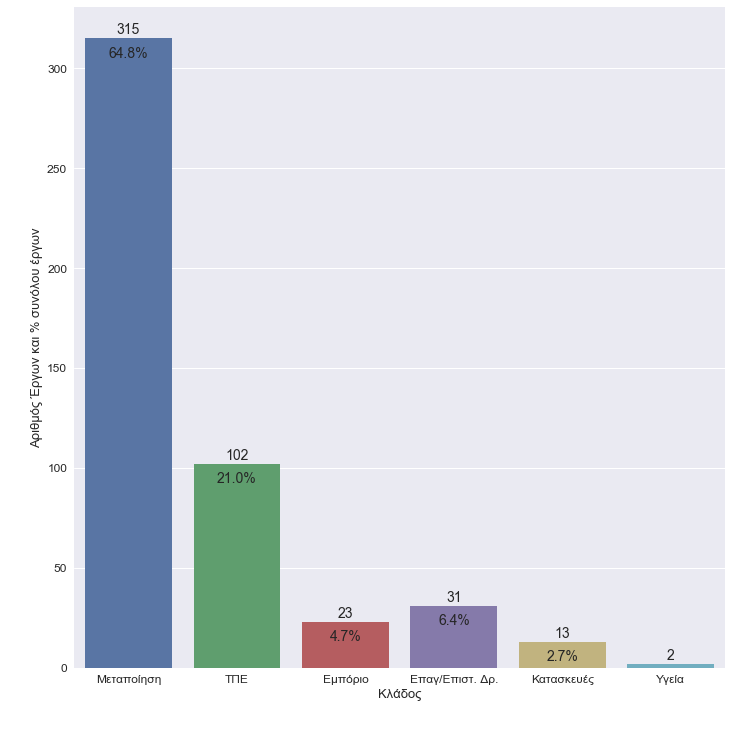

In [40]:
ncount = len(df)
ax = sns.barplot(x='Κλάδος', y="Αριθμός Έργων", data = totals_df, orient="v")
# ax.set_title('Σύνολο και ποσοστό έργων ανά κλάδο', fontsize=25)
ax.set_ylabel('Αριθμός Έργων και % συνόλου έργων')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format((y/ncount)*100), (x.mean(), y-4), 
            ha='center', va='top', fontsize=14)
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y+0.6), 
            ha='center', va='bottom', fontsize=14)
plt.tight_layout()
plt.savefig("exo_one/diagrams/Αριθμός Έργων.png", format='png', bbox_inches='tight')
# plt.clf()

### create charts for totals

In [41]:
output_dir = "exo_one/diagrams/"
for col in totals_df.columns[[3, 6, 9]]:
    ncount = totals_df[col].sum()
    ax = sns.barplot(x="Κλάδος", y=col, data = totals_df)
#     ax.set_title(totals_df[col].name + ', ανά κλάδο', fontsize=22)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f} εκ.'.format(y), (x.mean(), y+(2/100)*ncount), 
                ha='center', va='top', fontsize=14)
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(y/ncount*100), (x.mean(), y-(2.64/100)*ncount/1.5), 
                ha='center', va='bottom', fontsize=14)
    filename = col
    plt.tight_layout()
    plt.savefig('{}'.format(output_dir) + filename + ".png", format='png', bbox_inches='tight')
    plt.clf()

In [42]:
output_dir = "exo_one/diagrams/"
for col in totals_df.columns[[5, 8, 11]]:
    ncount = totals_df[col].sum()
    ax = sns.barplot(x="Κλάδος", y=col, data = totals_df)
#     ax.set_title(totals_df[col].name + ', ανά έργο', fontsize=22)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f} χιλ.'.format(y), (x.mean(), y+(0.8/100)*ncount), 
                ha='center', va='top', fontsize=14)
    filename = col
    plt.tight_layout()
    plt.savefig('{}'.format(output_dir) + filename + ".png", format='png', bbox_inches='tight')
    plt.clf()

### Create Stack bar with total budget and public expenditure

In [43]:
# totals_df[totals_df['Συνολικός Προϋπολογισμός'].index == 0]
#totals_df.iloc[0, 1]
# totals_df.iloc[0, 12]
# totals_df[totals_df.iloc[:,1:2].index==1]
# totals_df[['Συνολικός Προϋπολογισμός', 'Κλάδος']]# == 'Εμπόριο']

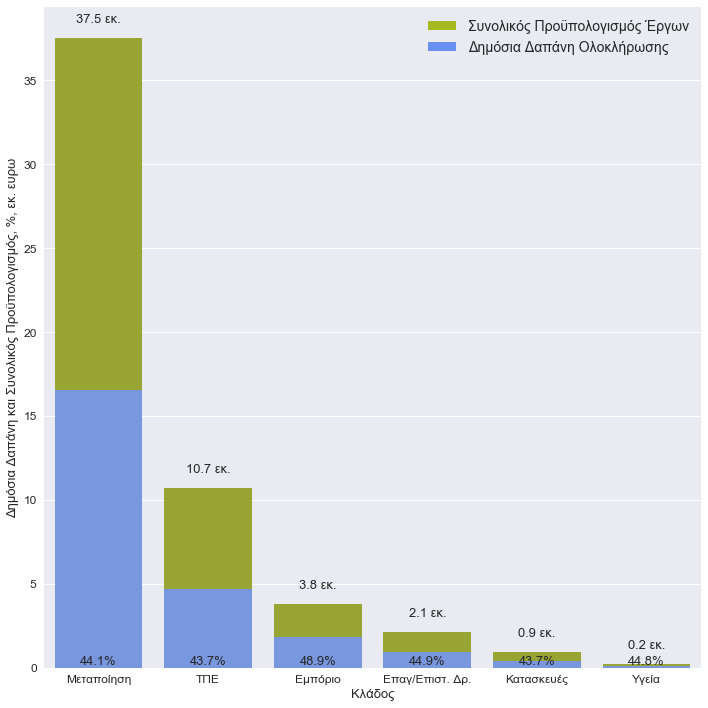

In [44]:
top_plot = sns.barplot(x='Κλάδος', y="Συνολικός Προϋπολογισμός, εκ. ευρώ", data = totals_df, orient="v", color='#A8B820')
#top_plot.set_title('% Δημόσιας Δαπάνης στο σύνολο του Προϋπολογισμού, ανά κλάδο', fontsize=22)

bottom_plot = sns.barplot(x = 'Κλάδος', y = 'Δημόσια Δαπάνη Ολοκλήρωσης, εκ. ευρώ', data = totals_df, orient="v", color = "#6890F0")
bottom_plot.set(xlabel='Κλάδος', ylabel='Δημόσια Δαπάνη και Συνολικός Προϋπολογισμός, %, εκ. ευρω')
n=0
for p in bottom_plot.patches:
    public_spending_perc = totals_df.iloc[n, 12]
    total_budget = totals_df.iloc[n, 1]
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[0,1]
    bottom_plot.annotate('{:.1f}%'.format(public_spending_perc), (x.mean(), y), 
            ha='center', va='bottom', fontsize=13)
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    top_plot.annotate('{:.1f} εκ.'.format(y), (x.mean(), y+(0.5/100)*ncount), 
            ha='center', va='top', fontsize=13)
    if n>4:
        break
    n+=1

topbar = plt.Rectangle((0,0),1,1,fc='#A8B820', edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#6890F0',  edgecolor = 'none')
l = plt.legend([topbar, bottombar], ['Συνολικός Προϋπολογισμός Έργων', 'Δημόσια Δαπάνη Ολοκλήρωσης'], loc=1, ncol = 1, prop={'size':14})
l.draw_frame(False)
plt.tight_layout()
plt.savefig("exo_one/diagrams/Ποσοστό Δημόσιας Δαπάνης ανά κλάδο.png", format='png', bbox_inches='tight')

In [45]:
# test = sns.barplot(x="Κλάδος", y="Συνολικός Προϋπολογισμός", data = general_sec_totals)
# # test.set(ylim=(1, 32000000))
# majorFormatter = FormatStrFormatter('%d')
# test.yaxis.set_major_formatter(majorFormatter)

In [ ]:
# ax = sns.factorplot(y="Κλάδος", x="Συνολικός Προϋπολογισμός, εκ. ευρώ", 
#                     hue="Κλάδος",
#                     data = totals_df,
#                 size=10, kind="bar")

In [ ]:
# ax = sns.factorplot(y="Κλάδος", x="Συνολικός Προϋπολογισμός", 
#                     hue="Κλάδος", dodge=False,
#                     data = general_sec_totals,
#                 size=10, kind="bar")

In [ ]:
# totals_graph = sns.factorplot(x="Κλάδος", y="Συνολικός Προϋπολογισμός", data = general_sec_totals,
#                 size=10, kind="bar")